## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

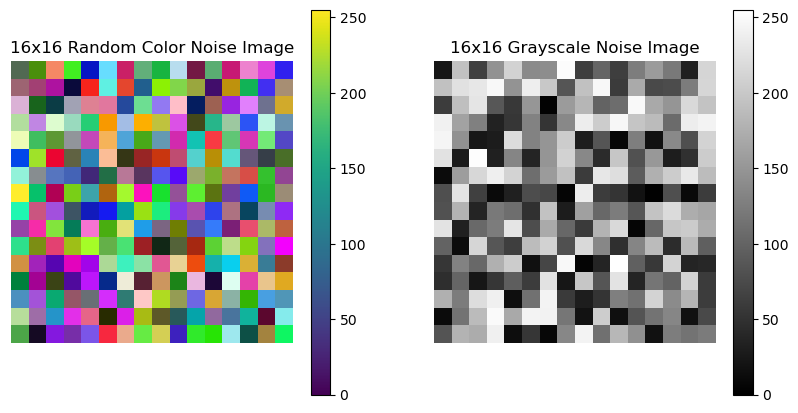

In [12]:
# Question 1 random noise color image
color_noise = np.random.randint(0, 256, (16, 16, 3), dtype=np.uint8)
gray_noise = np.random.randint(0,256,(16,16) , dtype= np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(color_noise)
plt.colorbar()
plt.title('16x16 Random Color Noise Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_noise, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.title('16x16 Grayscale Noise Image')
plt.axis('off')

plt.show()

In [41]:
#Question 2 
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color=(0, 255, 0)):
    """
    Divide an image into smaller patches using cropping and overlay grid lines.

    Parameters:
    - img: The source image (numpy array).
    - num_horizontal_grid: Number of patches along the horizontal axis.
    - num_vertical_grid: Number of patches along the vertical axis.
    - line_color: Color of the grid lines in BGR format (default is green).

    Returns:
    - img_with_grid: Image with overlaid grid lines.
    """

    img_copy = img.copy()
    height, width = img.shape[:2]

    # Calculate dimensions of each patch
    patch_height = height // num_vertical_grid
    patch_width = width // num_horizontal_grid

    # Draw grid lines
    for i in range(1, num_horizontal_grid):
        x = i * patch_width
        cv.line(img_copy, (x, 0), (x, height), line_color, 1)

    for j in range(1, num_vertical_grid):
        y = j * patch_height
        cv.line(img_copy, (0, y), (width, y), line_color, 1)

    return img_copy

# Example usage:
if __name__ == "__main__":
    # Load an example image
    img = cv.imread('images/dog.jfif')

    # Define grid parameters
    num_horizontal_grid = 3
    num_vertical_grid = 2
    line_color = (0, 255, 0)  # Green color for grid lines

    # Apply crop_grid function
    img_with_grid = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

    # Display the image with grid lines
    cv.imshow('Image with Grid Lines', img_with_grid)
    cv.waitKey(0)
    cv.destroyAllWindows()

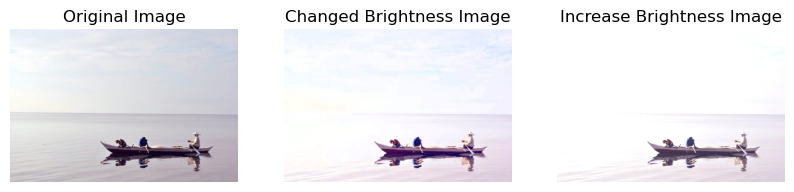

In [42]:
#Question 3 change the brightness of a color image

def increase_brightness(img, value):
    img_bright = cv.convertScaleAbs(img, alpha=1, beta=value)
    return img_bright

def change_brightness(img, value):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv) 
    v = cv.add(v, value) 
    v = np.clip(v, 0, 255)  
    final_hsv = cv.merge((h, s, v)) 
    img_bright = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR) 
    return img_bright

img_path = 'images/boat.jpg'
img = cv.imread(img_path)

if img is None:
    print(f"Error: Unable to load image from path {img_path}")
else:
    value = 50  

bright_img1 = change_brightness(img, value)
bright_img2 = increase_brightness(img, value)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Changed Brightness Image')
plt.axis('off')
plt.imshow(cv.cvtColor(bright_img1, cv.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title('Increase Brightness Image')
plt.axis('off')
plt.imshow(cv.cvtColor(bright_img2, cv.COLOR_BGR2RGB))

plt.show()

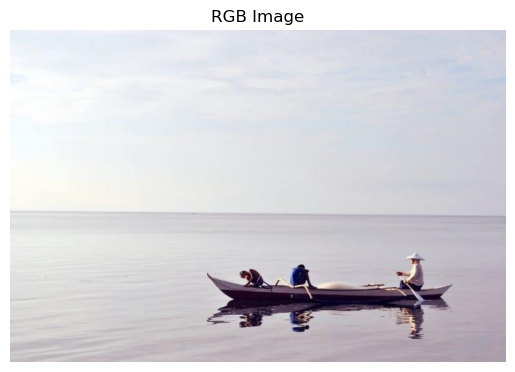

In [43]:
# Question 4 : convert from BGR to RGB
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(img_path)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('RGB Image')
plt.axis('off')
plt.show()


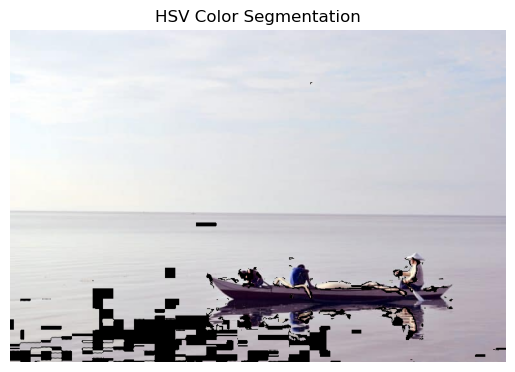

In [39]:
# Question 4 : HSV segment out different colors

img = cv.imread(img_path)

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_blue = np.array([0,0,0])
upper_blue = np.array([160, 255, 255])

mask = cv.inRange(hsv_img, lower_blue, upper_blue)
result = cv.bitwise_and(img, img, mask=mask)

plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('HSV Color Segmentation')
plt.axis('off')
plt.show()

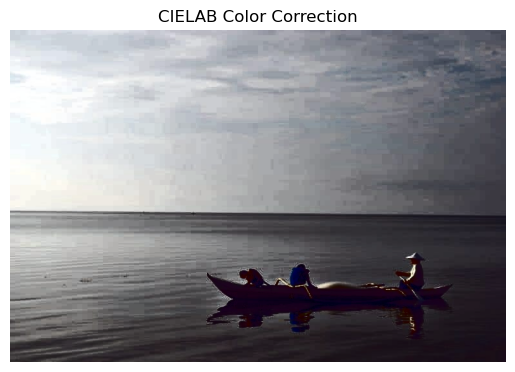

In [27]:
# Question 4 : transforming an image into the CIELAB color space

img = cv.imread(img_path)

lab_img = cv.cvtColor(img, cv.COLOR_BGR2LAB)

l, a, b = cv.split(lab_img)

l_eq = cv.equalizeHist(l)

lab_eq_img = cv.merge((l_eq, a, b))

result = cv.cvtColor(lab_eq_img, cv.COLOR_LAB2BGR)

plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('CIELAB Color Correction')
plt.axis('off')
plt.show()